In [12]:
#2021.06.28. MON 
#Hankyeong

#00. 패키지 호출 
import numpy as np
import pandas as pd 
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#00-1. 씨드넘버 정의하기. 
np.random.seed(2021)
tf.random.set_seed(2021)

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline


In [2]:
#04. iris 데이터셋으로 품종 다중분류하기. 
#(1) 데이터셋 불러오기. 
iris = pd.read_csv('../../data/iris.csv', header=None) 
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#(2) 데이터셋 탐색하기. 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#(3) 데이터셋 결측치 확인하기. 
iris.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [5]:
#(4) target 변수 레이블 인코딩 이후 원핫 인코딩 처리하기. 
#①레이블 인코딩
lable_encoder = LabelEncoder()
y_le = lable_encoder.fit_transform(iris.iloc[:,-1].values)
y_le[:5]

array([0, 0, 0, 0, 0])

In [6]:
#②원핫 인코딩
Y_ohe = to_categorical(y_le)
Y_ohe[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
#(5) feature 변수 스케일링하기. 
mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(iris.iloc[:,:-1].values)
X_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [8]:
#(4) train, test 데이터셋으로 분할하기. 
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_ohe, test_size=0.25, random_state=2021, stratify=Y_ohe
)

#(5) train, test 데이터셋의 차원 확인하기. 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [9]:
#(4) 모델 정의하기. 
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(24, activation='relu'),
    Dense(3, activation='softmax')
])

#(5) 모델의 요약 정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [11]:
#(6) 모델 실행환경(컴파일) 설정하기. 
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

#(7) 모델 학습하기. 
model_fit = model.fit(
    X_train, Y_train, 
    validation_split=0.2,
    epochs=200,
    batch_size=30,
    verbose=0)

#(8) 모델 예측 및 평가하기. 
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 993us/step - loss: 0.1059 - accuracy: 0.9737


[0.10593720525503159, 0.9736841917037964]

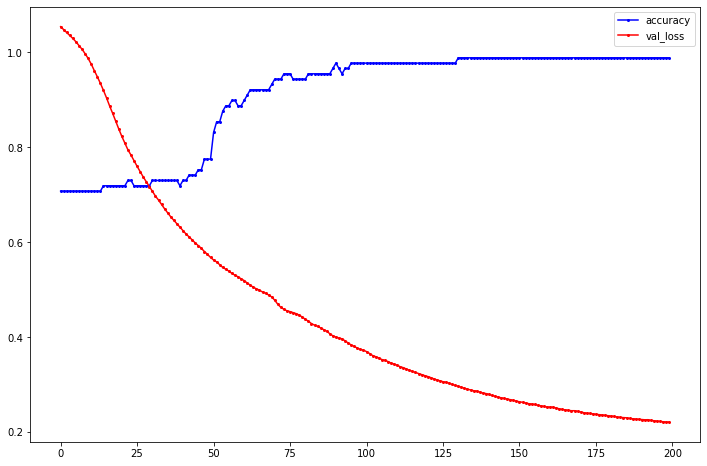

In [14]:
#(9) 훈련과정 시각화하기. 
y_acc = model_fit.history['accuracy']
y_vloss = model_fit.history['val_loss']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()